<a href="https://colab.research.google.com/gist/HarikaA9/1063acd2b5e7ebf4748bcc4b8e32665c/medical-cost-personal-datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
# For data handling and analysis  
import pandas as pd
import numpy as np

# For visualizing 
import matplotlib.pyplot as plt
import seaborn as sns

# To avoid any future warnings
import warnings


# Reading the Dataset 

In [171]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [172]:
df.shape

(1338, 7)

From the above we can identify that there are total 1338 observation and 7 features are present 

# Information of all the Attribute 

In [173]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

# 3- Data Preprocessing

# 3.1- Checking for the missing and dupicate records

In [174]:
df.isnull().values.any()

False

In [175]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

We can see that there is no missing value and duplicate record present in the data. 

#3.2- Exploring categorical and numerical values 

In [176]:
#statistical data of attributes 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From the above results, we can check the minimum, maximum, mean, standard deviation , 25%, 50%, 75% of all the numerical values 


*   Minimum age is 18 and the maximum age is 64. 
*   The minimum charges billed by the health insurance is $1121.87 and the maximum is at 63770.43.
*   The ideal BMI is from 18.5 to 24.9. The min and the max in the data is 15.96 and 53.13 respectively. 





In [177]:
# For categorical columns 

df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


The above results provides information about: 


*  The number of unique rows. ( count = 1338)
*  The unique values in each column (unique)
*  The unique values that apprears more frequent (top)
*  The number of time the unique value appreas(top).  





#3.3- Exploring unique values of categorical columns

In [178]:
#to explore unique values in the categorical columns
for column in df.columns:
  if df[column].dtype == object:
    print(str(column) + ":" + str(df[column].unique()))
    print(df[column].value_counts())
    print("---------------------------------------------------------------------")

sex:['female' 'male']
male      676
female    662
Name: sex, dtype: int64
---------------------------------------------------------------------
smoker:['yes' 'no']
no     1064
yes     274
Name: smoker, dtype: int64
---------------------------------------------------------------------
region:['southwest' 'southeast' 'northwest' 'northeast']
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
---------------------------------------------------------------------


# 4- Data Visualization 

#4.1 Exploring the categorical variables 

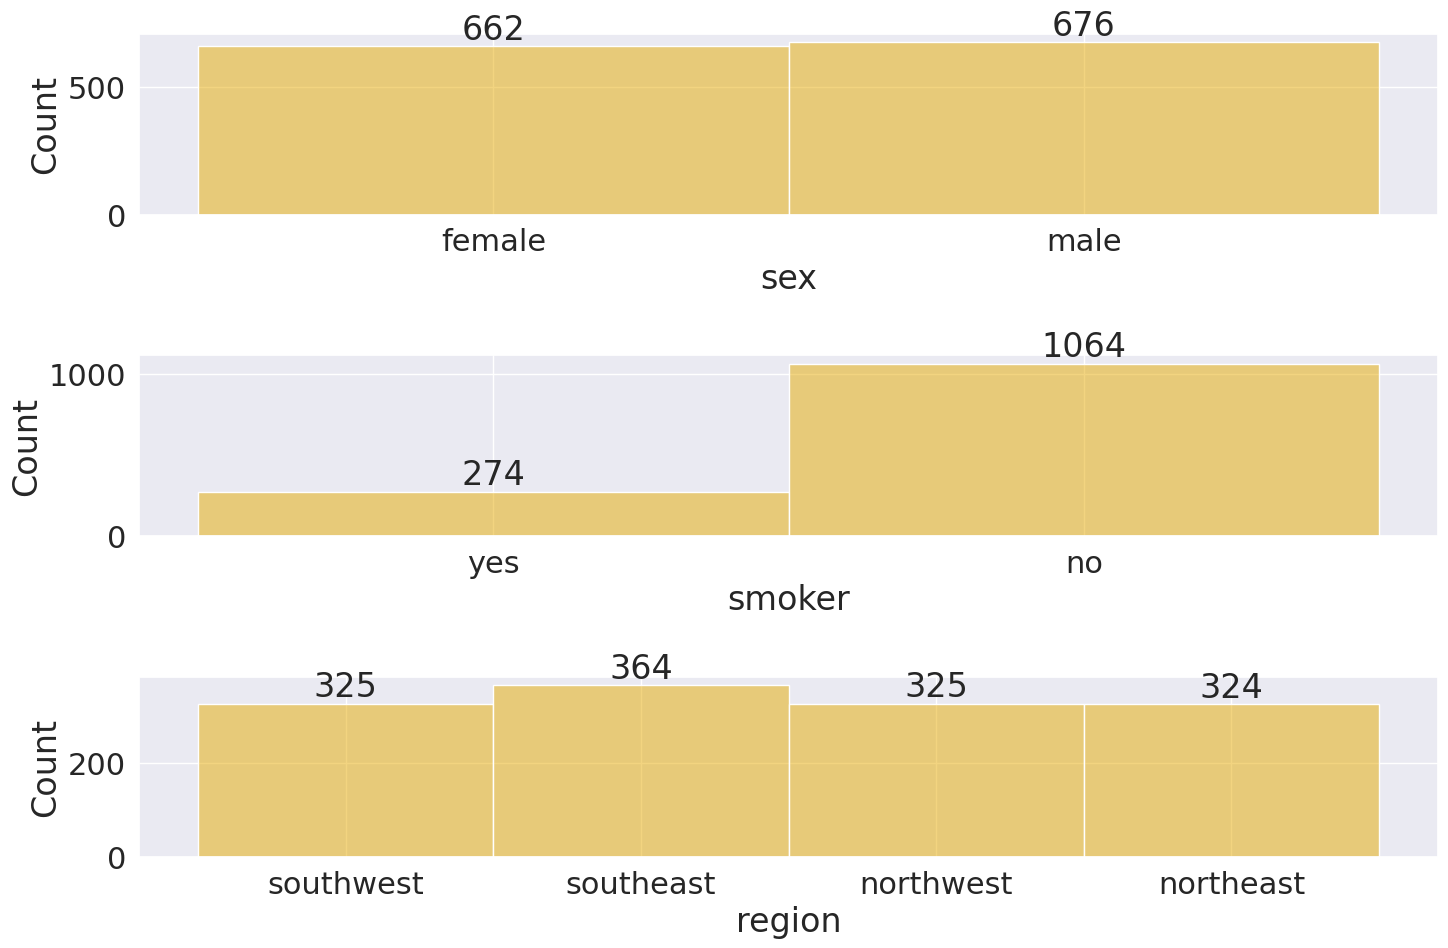

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
C_var = ['sex', 'smoker', 'region']

# Define color palette
my_palette = sns.color_palette('Dark2')

# Set font size
sns.set(font_scale=2)

# Create subplots and figure
fig, axes = plt.subplots(len(C_var), 1, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

# Plot histograms
for i, col in enumerate(C_var):
    ax = axes[i]
    sns.histplot(data=df, x=col, bins=30, color=my_palette[5], alpha=0.5, ax=ax)
    
    # Add count values on the bins
    counts = df[col].value_counts()
    for rect in ax.patches:
        x = rect.get_x() + rect.get_width() / 2
        y = rect.get_height()
        ax.text(x, y, f"{y}", ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


# 4.2 Exploration on Numerical Columns  

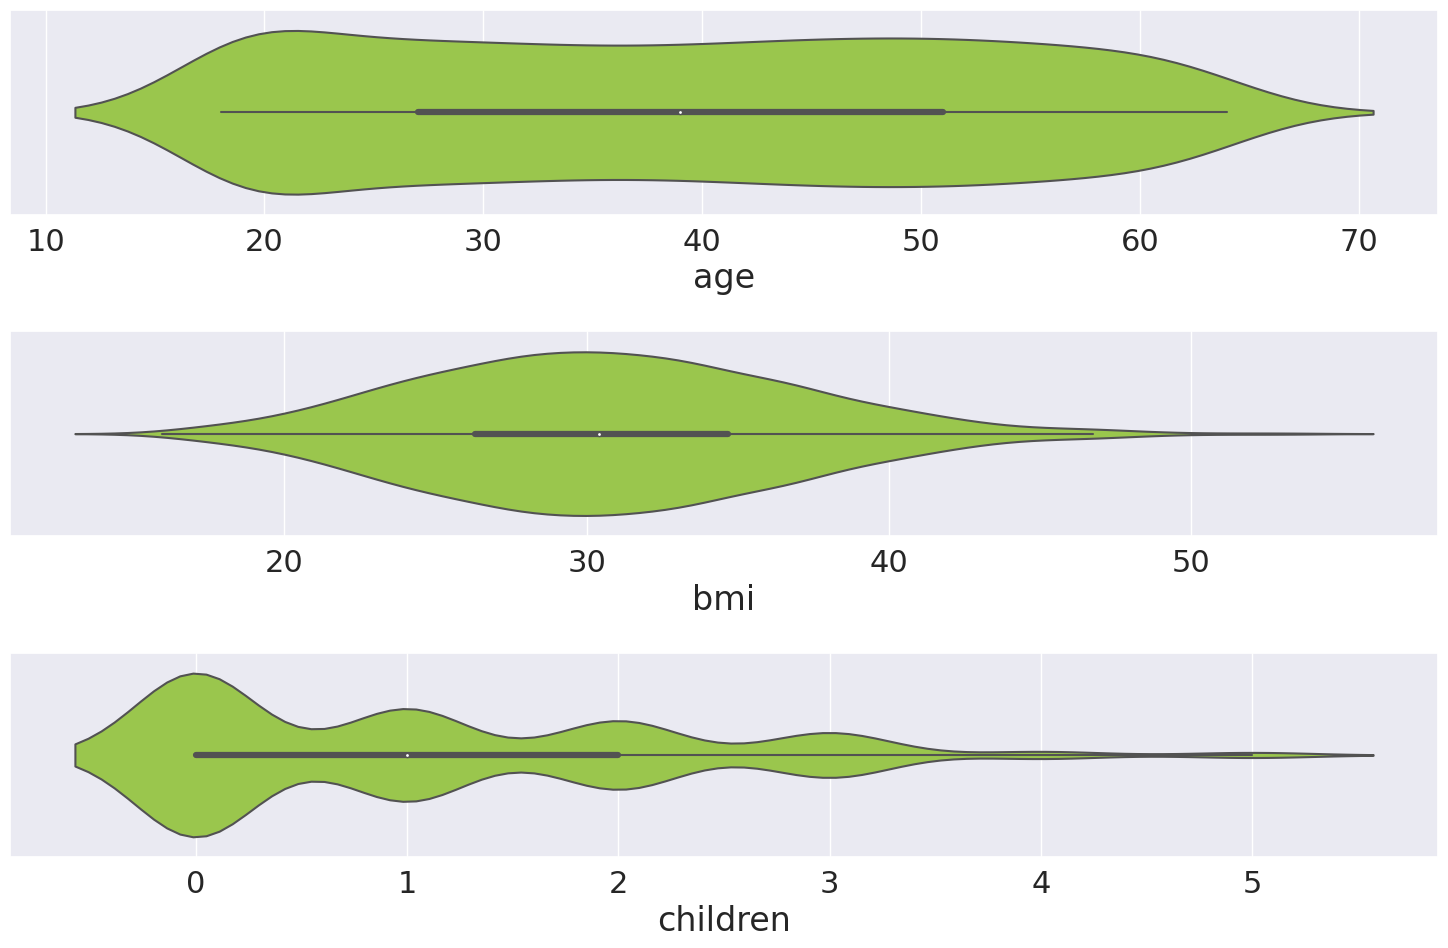

In [180]:
# List of numerical columns
N_var = ['age', 'bmi', 'children']

# Define color palette
my_palette = sns.color_palette('viridis')

# Set font size
sns.set(font_scale=2)

# Create subplots and figure
fig, axes = plt.subplots(len(N_var), 1, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

# Plot histograms
for i, col in enumerate(N_var):
    sns.violinplot(data=df, x=col, bins=30, color=my_palette[5], alpha=0.5, ax=axes[i])

# Display the plot
plt.tight_layout()
plt.show()


From the above violinplot, 

we observe the data distribution of various numerical attributes. 
*   The average age lies between 30-50 years 
*   The median of BMI is 30 and the thicker portion of the violin conatins more than 50% of data. 







#4.3 Scatterplot 

BY using scatterplot we would like visulaize the correlation between numerical variables with categorical varibles . 

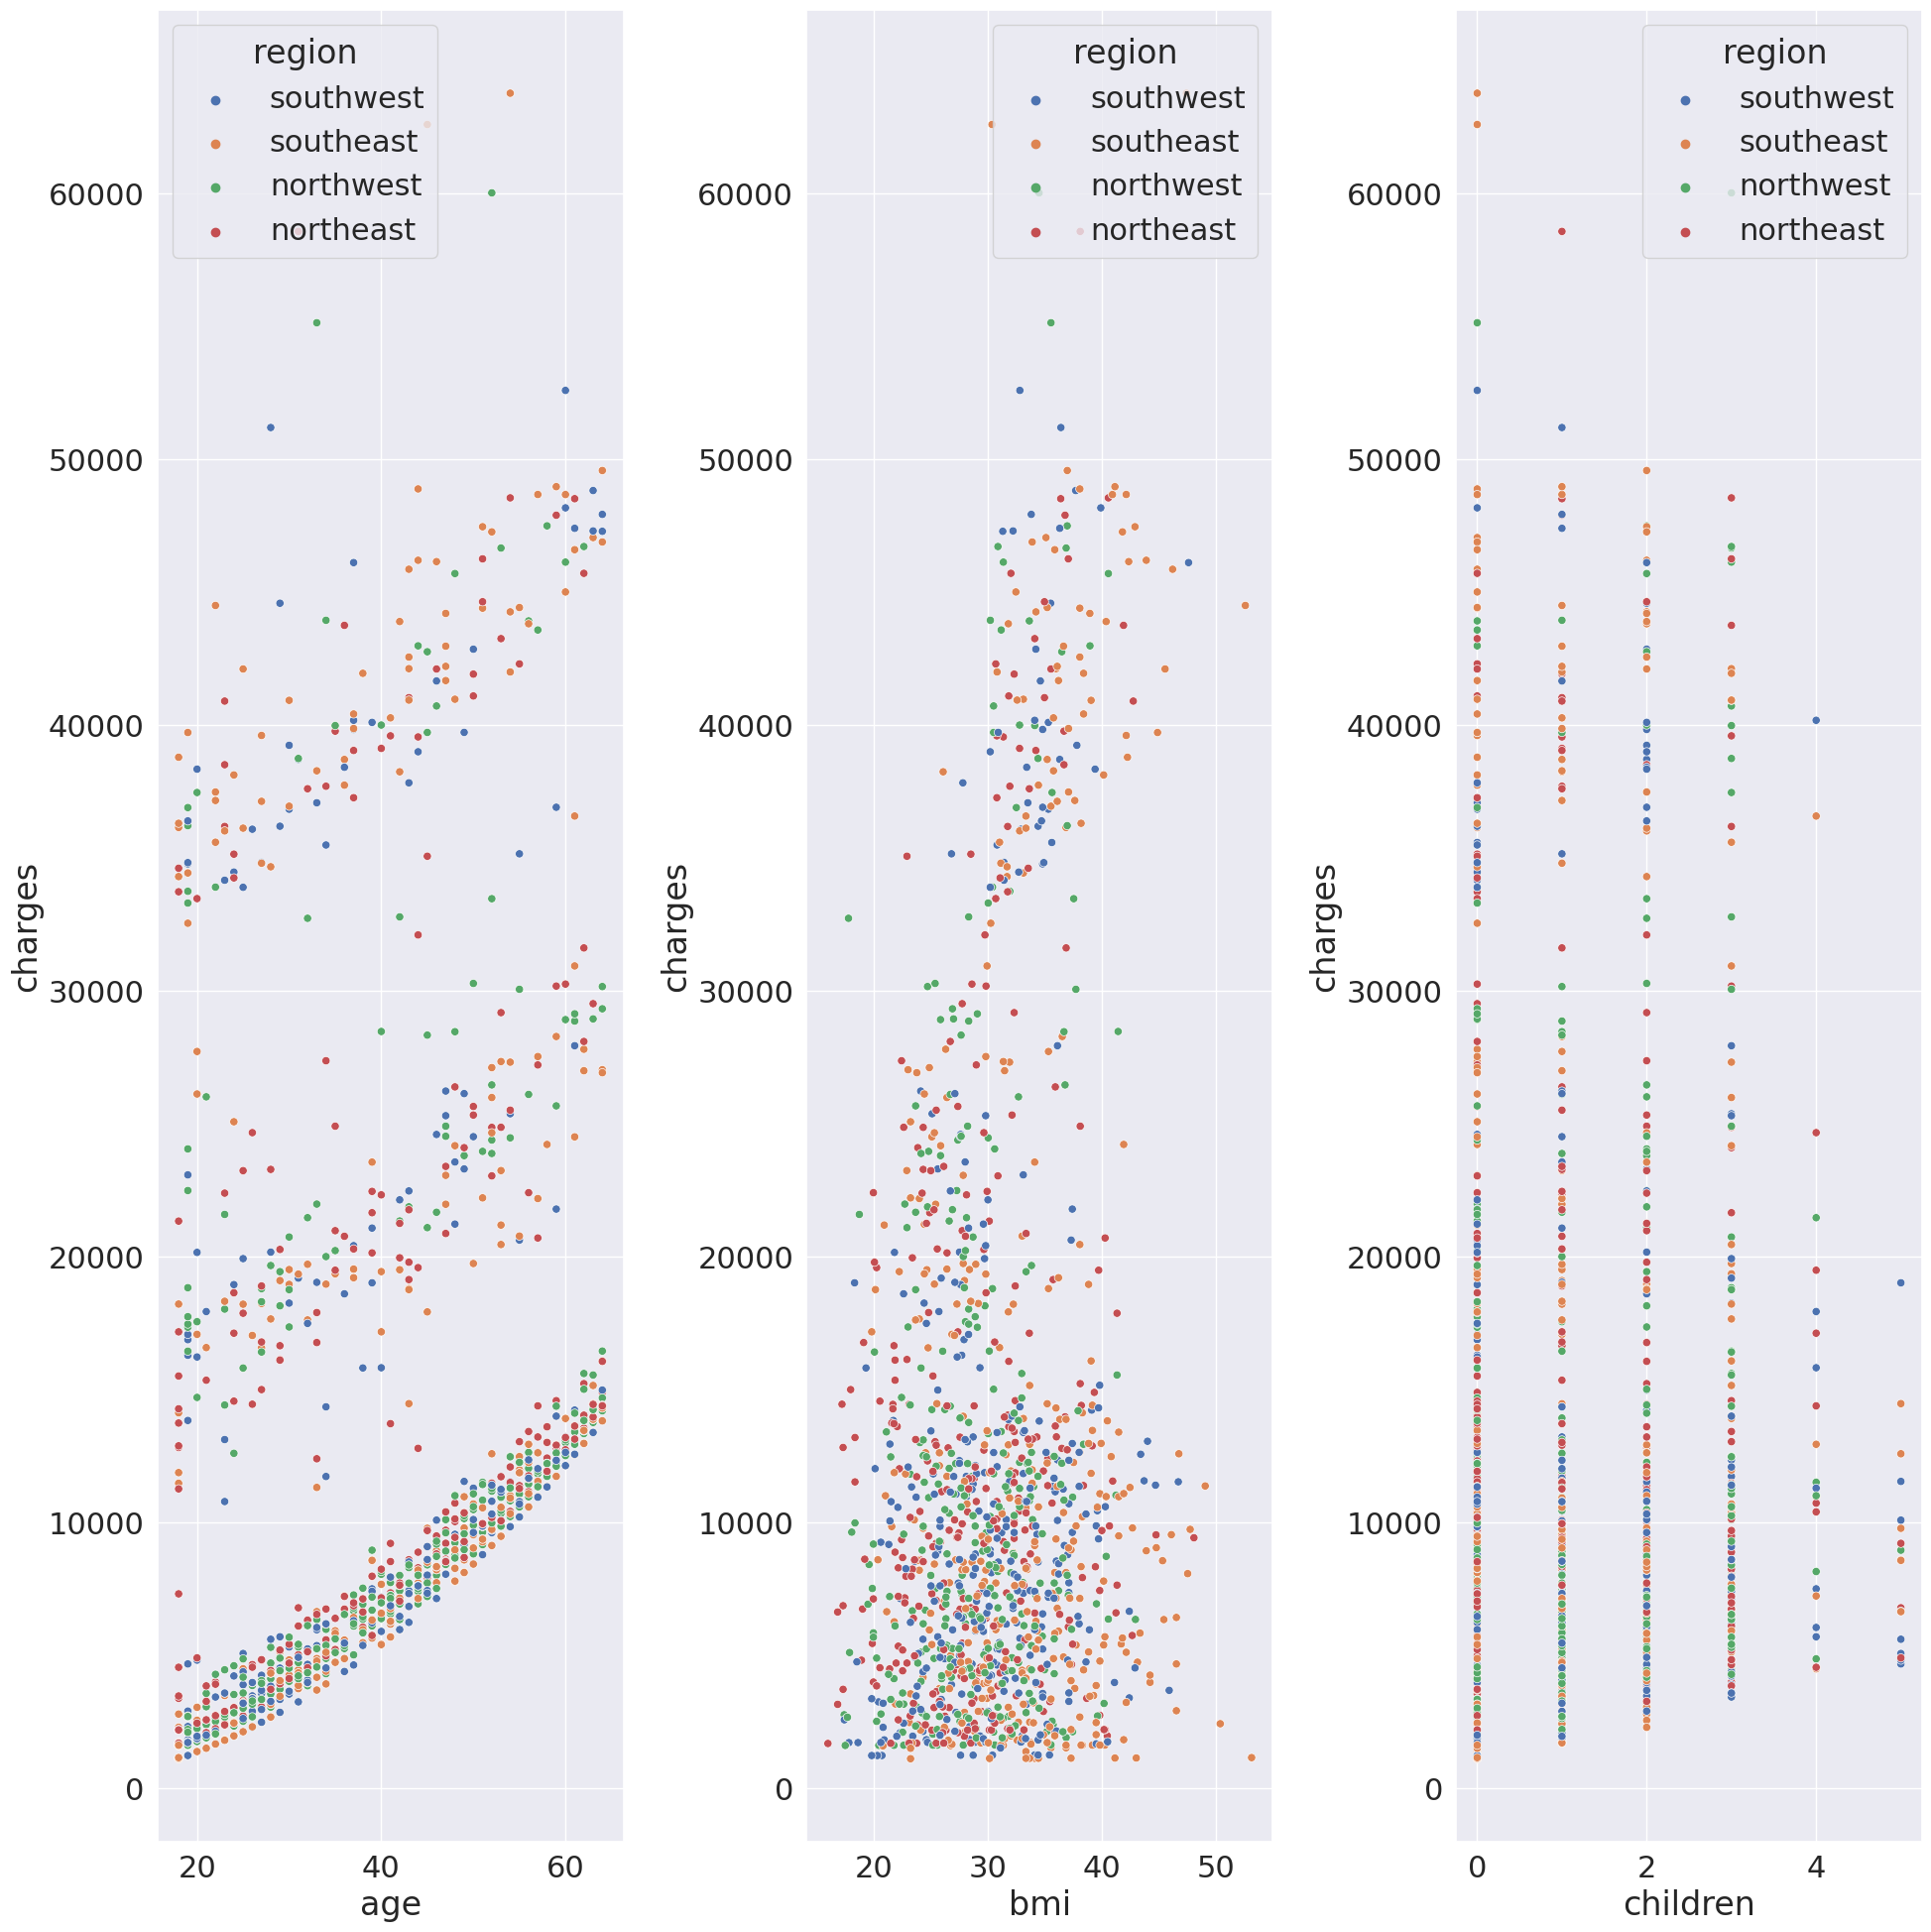

In [181]:
# scatterplot for age bmi and children based on categorical variables region 

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(N_var):
    sns.scatterplot(x=var, y='charges', hue='region', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

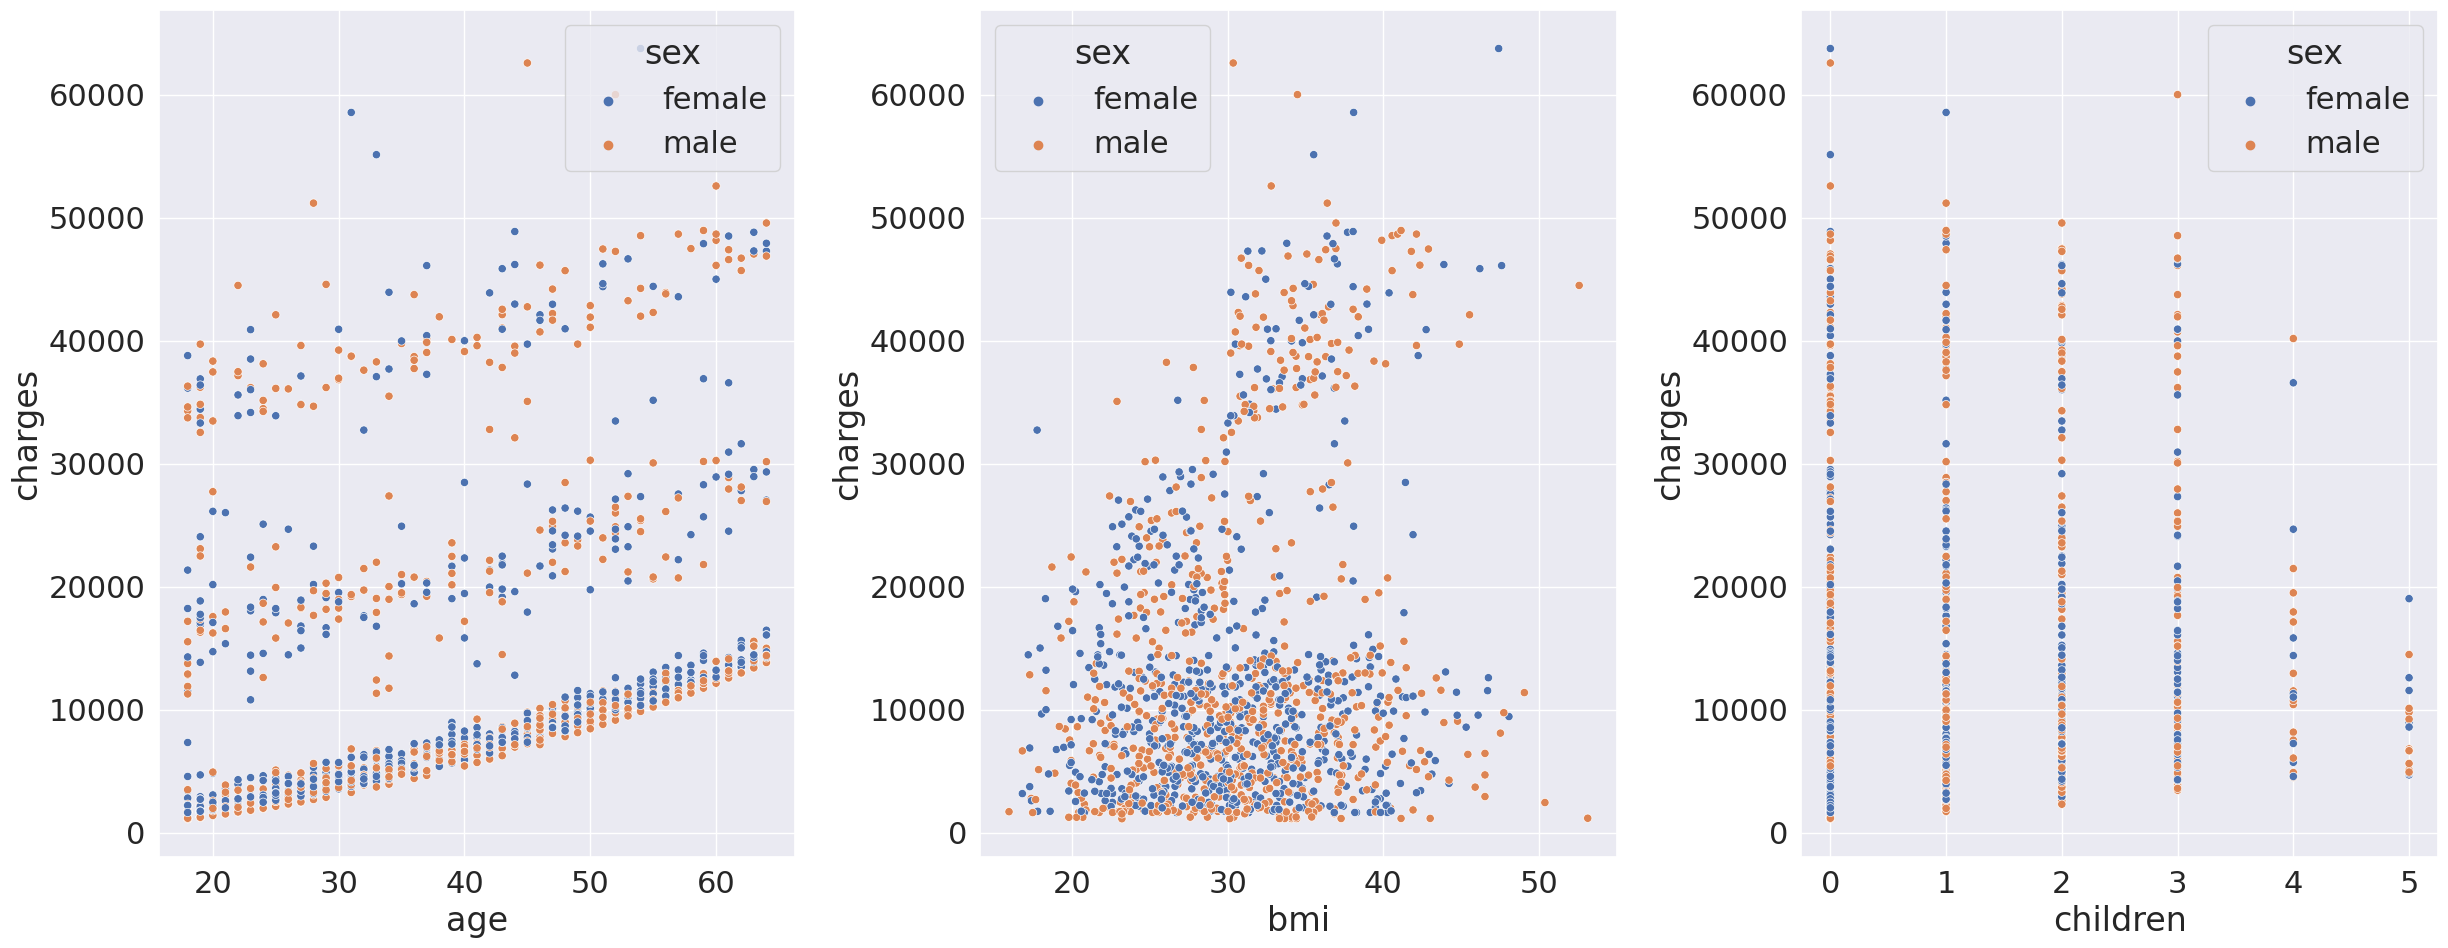

In [182]:
# scatterplot for age bmi and children based on categorical variables 'sex'

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))
axs = axs.flatten()

for i, var in enumerate(N_var):
    sns.scatterplot(x=var, y='charges', hue='sex', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

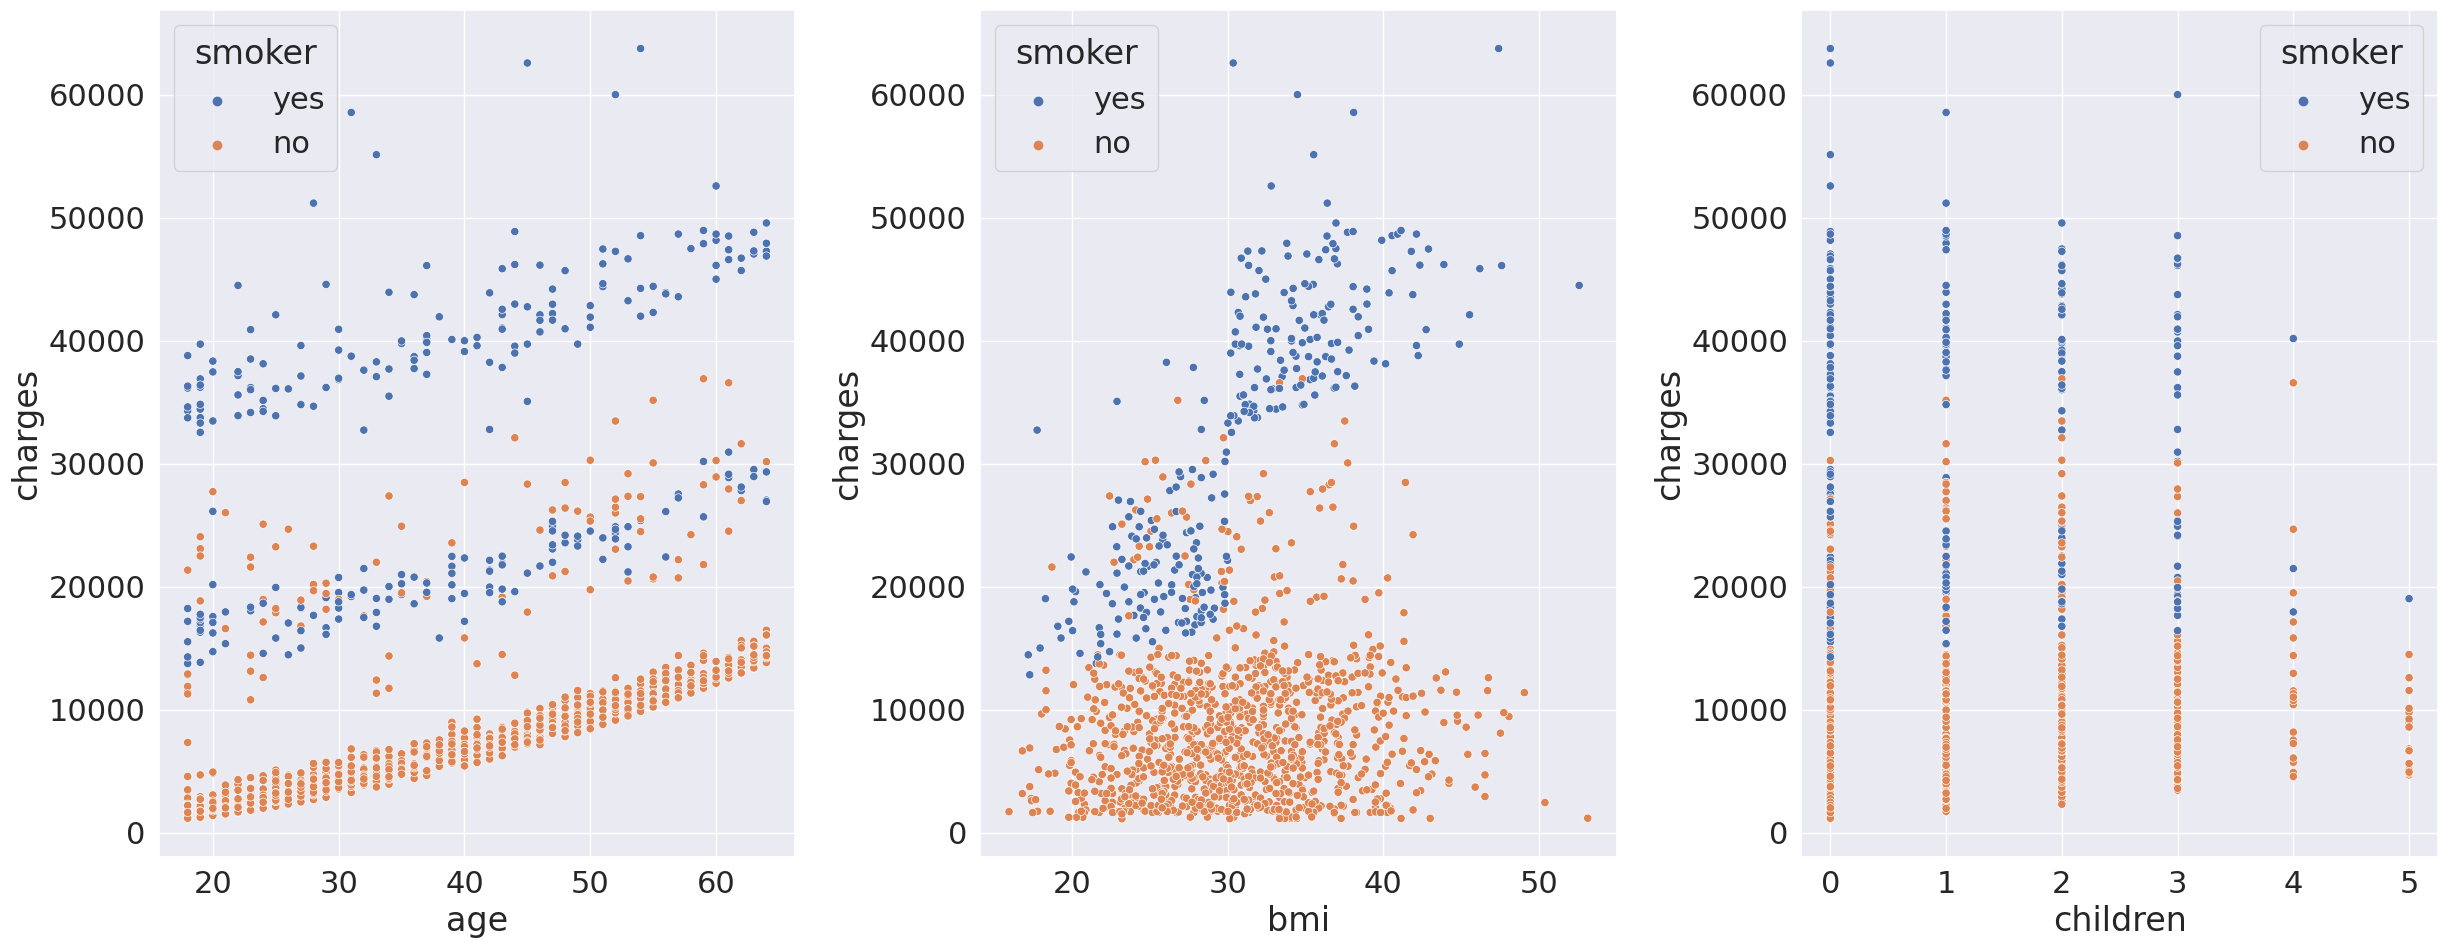

In [183]:
# scatterplot for age bmi and children based on categorical variables 'smoker'

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))
axs = axs.flatten()

for i, var in enumerate(N_var):
    sns.scatterplot(x=var, y='charges', hue='smoker', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

# 4.4 Converting categorical variable into numerical variable 

In [184]:
from sklearn import preprocessing

# Create an empty dictionary to store encoded values
encoded_values = {}

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Store the column name and the unique encoded values in the dictionary
    encoded_values[col] = df[col].unique()

# Print the encoded values
for col, values in encoded_values.items():
    print(f"{col}: {values}")


sex: [0 1]
smoker: [1 0]
region: [3 2 1 0]


In [229]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# 4.5 Removing Outliers using Z score

In [230]:
from scipy import stats

# define a function to remove outliers using z-score for only selected numerical columns
def remove_outliers(df, cols, threshold=3):
    # loop over each selected column
    for col in cols:
        # calculate z-score for each data point in selected column
        z = np.abs(stats.zscore(df[col]))
        # remove rows with z-score greater than threshold in selected column
        df = df[(z < threshold) | (df[col].isnull())]
    return df 

In [231]:
selected_cols = ['bmi']
df_clean = remove_outliers(df, selected_cols)
df_clean.shape

(1334, 7)

In [232]:
df.shape

(1338, 7)

#5 Checking Coorelation 

# 5.1 Scatter plot 

In [187]:

#import matplotlib.pyplot as plt

#plt.figure(figsize=(20, 16))
#sns.set(font_scale=1.2)  # Increase font size for better readability

 # Sample cleaned data with 100 observations and 7 variables
#cleaned_data = np.random.randn(100, 7 )

# Convert cleaned_data to a pandas DataFrame
#df_cleaned = pd.DataFrame(cleaned_data, columns=[ 'age','sex', 'bmi', 'children', 'smoker',	'region',	'charges'])

#sns.pairplot(df_cleaned)
#plt.show()

# 5.2 Coorelation Matrix 

<Axes: >

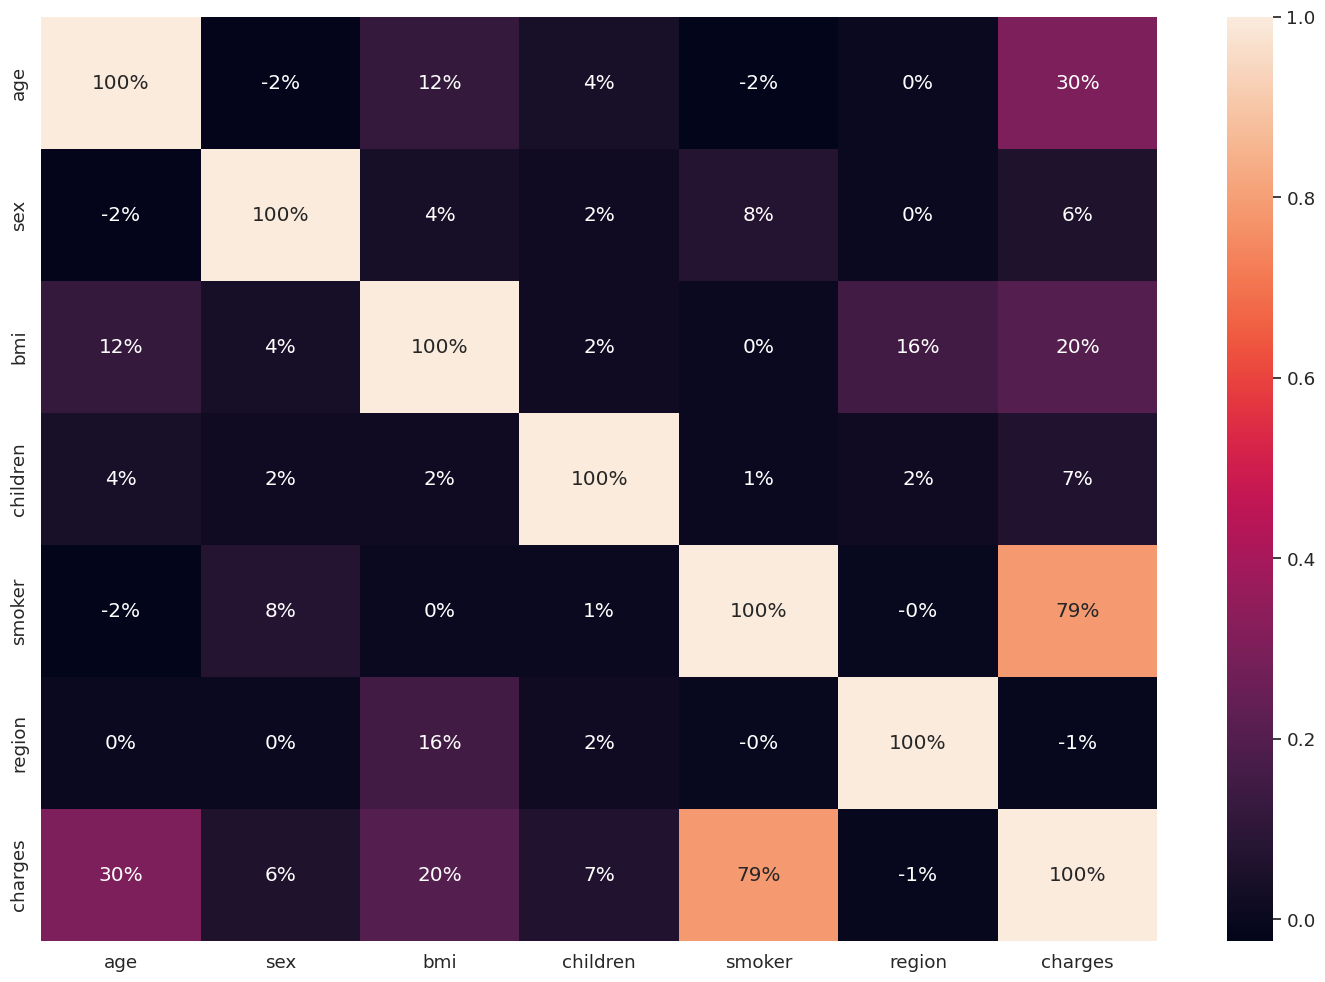

In [233]:
#Correlation Heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(df_clean.corr(), fmt='.0%', annot=True)


From the above scatter and correlation matrix, It is observed that there is a weak to moderate correlation between variables. 


*   -1% are signified as the weak negative correlation. When 1 varibles increase the other variable tend to decrease slightly.
*   1%-79%  are signified as the weak positive correlation. As one varibles increase then the other varibles increase slightly. 




#6 Methodology 

#6.1 Test and Train data

In [235]:
X = df_clean.iloc[:, :-1]
y = df_clean.iloc[:, -1]


In [236]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

#6.2 Random Forest 

In [246]:
# Random forest regression model is initialized and trained on the training data using a pipeline that includes feature scaling with a standard scaler transformer.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", as_frame=True)
X = boston.data
y = boston.target

rf = RandomForestRegressor()

#  Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', error_score='raise')


# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
`max_fe

Best Hyperparameters:  {'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}


In [247]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=5, min_samples_split=10, min_samples_leaf=4, 
                           max_features='auto')
rf.fit(X_train, y_train)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


RandomForestRegressor(max_depth=5, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10, random_state=0)

In [248]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 2439.7944683926576
MAPE is 0.280797784076888
MSE is 19747580.91254748
R2 score is 0.8638649553585273
RMSE score is 4443.8250317207


We have a accuracy of 86% for thus model using Random forest. 

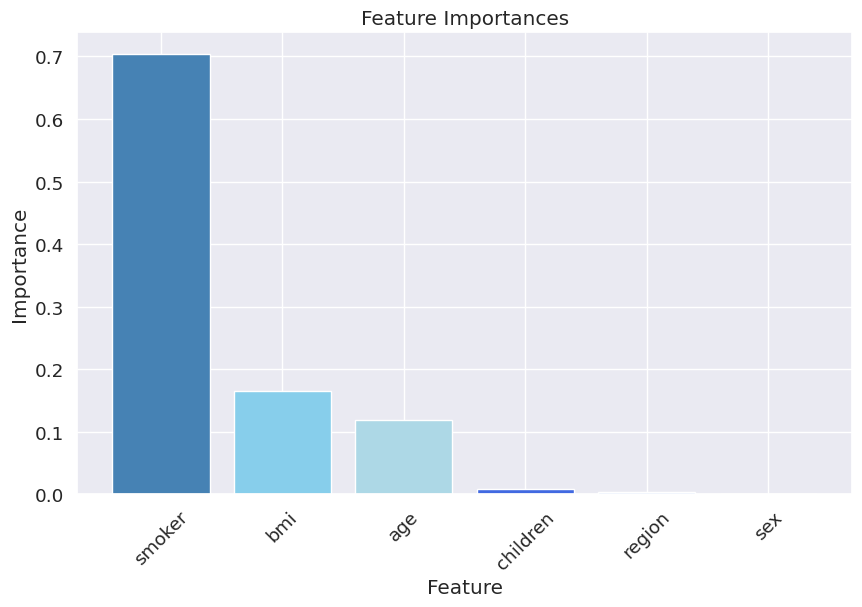

In [257]:
import matplotlib.pyplot as plt

# Create the feature names list
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# Create the feature importance DataFrame
imp_df = pd.DataFrame({
    "Feature Name": feature_names,
    "Importance": rf.feature_importances_
})

# Sort the DataFrame by feature importance in descending order
imp_df = imp_df.sort_values(by="Importance", ascending=False)

# Create a color palette
colors = ['steelblue', 'skyblue', 'lightblue', 'royalblue', 'cornflowerblue', 'deepskyblue']

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(imp_df["Feature Name"], imp_df["Importance"], color=colors)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(rotation=45)
plt.show()



Smoking appears to be the most important feature followed by Body mass index and age. 

# 7 Conclusion 

Based on our Medical cost personal dataset, we can draw conclusion such as, 


*  There is a good predicting power as the model achieves 86% accuracy.
*  Smoking can cause adverse effect on ones health, which will impact the healthcare expenses.importance of smoking cessation programs and public health interventions to reduce smoking rates and associated healthcare costs
* These results highlights the importance of targeted interventions, preventive measures, and personalized healthcare approaches to address the impact of these factors on medical costs and improve health outcomes.







